In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import os
import sklearn.preprocessing
from sklearn.model_selection import train_test_split

In [11]:
SPRatings = pd.read_csv("SPRatings.csv")

In [12]:
SPRatings = SPRatings.drop(SPRatings.columns[0], axis=1)
SPRatings

,Global Company Key,S&P Domestic Long Term Issuer Credit Rating,Data Date,Company Name,Ticker Symbol,Shillers Cyclically Adjusted P/E Ratio,Book/Market,Enterprise Value Multiple,"Price/Operating Earnings (Basic, Excl. EI)","Price/Operating Earnings (Diluted, Excl. EI)",...,Receivables Turnover,Payables Turnover,Sales/Invested Capital,Sales/Stockholders Equity,Research and Development/Sales,Avertising Expenses/Sales,Labor Expenses/Sales,Accruals/Average Assets,Price/Book,Dividend Yield
0,1447,A+,20040229,AMERICAN EXPRESS CO,AXP,27.958,0.247,20.164,22.829,23.126,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.476,0.00749
1,1447,A+,20040331,AMERICAN EXPRESS CO,AXP,27.264,0.247,20.164,22.158,22.446,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.365,0.00771
2,1447,A+,20040430,AMERICAN EXPRESS CO,AXP,25.740,0.247,20.164,20.919,21.190,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.121,0.00817
3,1447,A+,20040531,AMERICAN EXPRESS CO,AXP,26.623,0.237,20.164,20.444,20.779,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.118,0.00789
4,1447,A+,20040630,AMERICAN EXPRESS CO,AXP,26.980,0.237,20.164,20.718,21.057,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.173,0.00779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,177376,BBB-,20161031,DISCOVER FINANCIAL SVCS,DFS,9.508,0.497,9.914,10.393,10.412,...,0.145,0.111,0.290,0.897,0.0,0.020,0.133,0.020,2.050,0.02130
5055,177376,BBB-,20161130,DISCOVER FINANCIAL SVCS,DFS,11.374,0.481,10.167,12.412,12.412,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.478,0.01770
5056,177376,BBB-,20161231,DISCOVER FINANCIAL SVCS,DFS,12.099,0.481,10.167,13.203,13.203,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.636,0.01660
5057,177376,BBB-,20170131,DISCOVER FINANCIAL SVCS,DFS,11.468,0.481,10.167,12.689,12.689,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.498,0.01730


<BarContainer object of 11 artists>

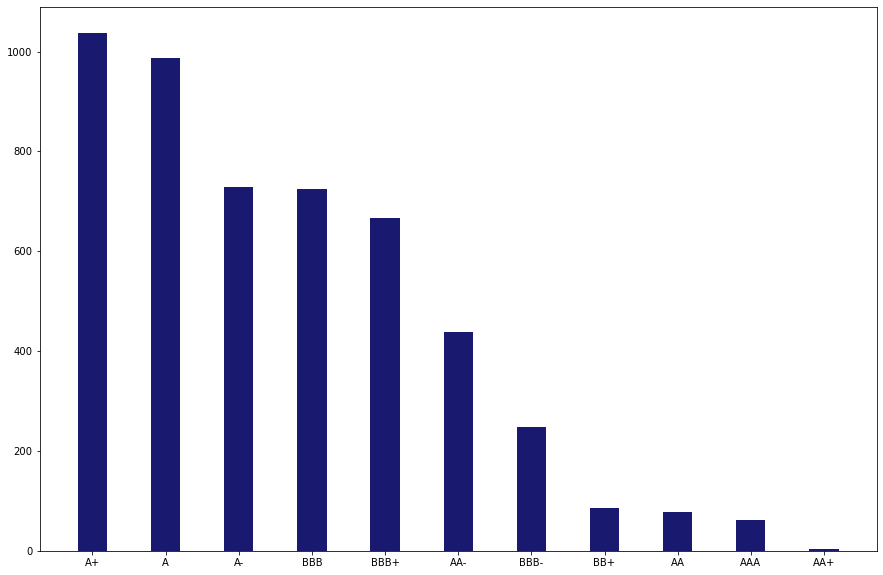

In [4]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

fggh = SPRatings['S&P Domestic Long Term Issuer Credit Rating'].value_counts().tolist()
fggg = SPRatings['S&P Domestic Long Term Issuer Credit Rating'].value_counts().index.tolist()

fig = plt.figure(figsize = (15, 10))
plt.bar(fggg, fggh, color ='midnightblue',
        width = 0.4)

In [8]:
SPRatings

,S&P Domestic Long Term Issuer Credit Rating,Data Date,Company Name,Ticker Symbol,Shillers Cyclically Adjusted P/E Ratio,Book/Market,Enterprise Value Multiple,"Price/Operating Earnings (Basic, Excl. EI)","Price/Operating Earnings (Diluted, Excl. EI)","P/E (Diluted, Excl. EI)",...,Sales/Stockholders Equity,Research and Development/Sales,Avertising Expenses/Sales,Labor Expenses/Sales,Accruals/Average Assets,Price/Book,Dividend Yield,Year,Month,Day
0,A+,20040229,AMERICAN EXPRESS CO,AXP,27.958,0.247,20.164,22.829,23.126,23.126,...,1.735,0.0,0.000,0.238,-0.003,4.476,0.00749,2004,2,29
1,A+,20040331,AMERICAN EXPRESS CO,AXP,27.264,0.247,20.164,22.158,22.446,22.446,...,1.735,0.0,0.000,0.238,-0.003,4.365,0.00771,2004,3,31
2,A+,20040430,AMERICAN EXPRESS CO,AXP,25.740,0.247,20.164,20.919,21.190,21.190,...,1.735,0.0,0.000,0.238,-0.003,4.121,0.00817,2004,4,30
3,A+,20040531,AMERICAN EXPRESS CO,AXP,26.623,0.237,20.164,20.444,20.779,20.779,...,1.819,0.0,0.000,0.238,0.016,4.118,0.00789,2004,5,31
4,A+,20040630,AMERICAN EXPRESS CO,AXP,26.980,0.237,20.164,20.718,21.057,21.057,...,1.819,0.0,0.000,0.238,0.016,4.173,0.00779,2004,6,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,BBB-,20161031,DISCOVER FINANCIAL SVCS,DFS,9.508,0.497,9.914,10.393,10.412,10.568,...,0.897,0.0,0.020,0.133,0.020,2.050,0.02130,2016,10,31
5055,BBB-,20161130,DISCOVER FINANCIAL SVCS,DFS,11.374,0.481,10.167,12.412,12.412,12.322,...,0.909,0.0,0.020,0.133,0.021,2.478,0.01770,2016,11,30
5056,BBB-,20161231,DISCOVER FINANCIAL SVCS,DFS,12.099,0.481,10.167,13.203,13.203,13.107,...,0.909,0.0,0.020,0.133,0.021,2.636,0.01660,2016,12,31
5057,BBB-,20170131,DISCOVER FINANCIAL SVCS,DFS,11.468,0.481,10.167,12.689,12.689,12.596,...,0.909,0.0,0.020,0.133,0.021,2.498,0.01730,2017,1,31


In [9]:
uni = len(pd.unique(SPRatings['S&P Domestic Long Term Issuer Credit Rating']))
uni

11

In [13]:
scale_mapper = {'A':0,'A+':1, 'A-':2, 'AA':3, 'AA+':4, 'AA-':5, 'AAA':6, 'BB+':7, 'BBB':8, 'BBB+':9,'BBB-':10}
SPRatings['S&P Domestic Long Term Issuer Credit Rating']=SPRatings['S&P Domestic Long Term Issuer Credit Rating'].replace(scale_mapper)
SPRatings

,Global Company Key,S&P Domestic Long Term Issuer Credit Rating,Data Date,Company Name,Ticker Symbol,Shillers Cyclically Adjusted P/E Ratio,Book/Market,Enterprise Value Multiple,"Price/Operating Earnings (Basic, Excl. EI)","Price/Operating Earnings (Diluted, Excl. EI)",...,Receivables Turnover,Payables Turnover,Sales/Invested Capital,Sales/Stockholders Equity,Research and Development/Sales,Avertising Expenses/Sales,Labor Expenses/Sales,Accruals/Average Assets,Price/Book,Dividend Yield
0,1447,1,20040229,AMERICAN EXPRESS CO,AXP,27.958,0.247,20.164,22.829,23.126,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.476,0.00749
1,1447,1,20040331,AMERICAN EXPRESS CO,AXP,27.264,0.247,20.164,22.158,22.446,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.365,0.00771
2,1447,1,20040430,AMERICAN EXPRESS CO,AXP,25.740,0.247,20.164,20.919,21.190,...,0.414,0.639,0.817,1.735,0.0,0.000,0.238,-0.003,4.121,0.00817
3,1447,1,20040531,AMERICAN EXPRESS CO,AXP,26.623,0.237,20.164,20.444,20.779,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.118,0.00789
4,1447,1,20040630,AMERICAN EXPRESS CO,AXP,26.980,0.237,20.164,20.718,21.057,...,0.433,0.666,0.798,1.819,0.0,0.000,0.238,0.016,4.173,0.00779
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,177376,10,20161031,DISCOVER FINANCIAL SVCS,DFS,9.508,0.497,9.914,10.393,10.412,...,0.145,0.111,0.290,0.897,0.0,0.020,0.133,0.020,2.050,0.02130
5055,177376,10,20161130,DISCOVER FINANCIAL SVCS,DFS,11.374,0.481,10.167,12.412,12.412,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.478,0.01770
5056,177376,10,20161231,DISCOVER FINANCIAL SVCS,DFS,12.099,0.481,10.167,13.203,13.203,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.636,0.01660
5057,177376,10,20170131,DISCOVER FINANCIAL SVCS,DFS,11.468,0.481,10.167,12.689,12.689,...,0.146,0.117,0.288,0.909,0.0,0.020,0.133,0.021,2.498,0.01730


In [16]:
df1 = SPRatings["S&P Domestic Long Term Issuer Credit Rating"]
df2 = SPRatings.drop(['S&P Domestic Long Term Issuer Credit Rating'],axis=1)

In [22]:
correlation_KP = df2.corrwith(df1,axis=0)
correlation_KP = correlation_KP.sort_values(ascending=False)
correlation_KP_df = correlation_KP.to_frame()
correlation_KP_df = correlation_KP_df.reset_index()
correlation_KP_df.columns = ['Independent Variables','Rating Correlation']
correlation_KP_df

,Independent Variables,Rating Correlation
0,Long-term Debt/Total Liabilities,0.234065
1,Book/Market,0.186596
2,Data Date,0.178673
3,Total Debt/Capital,0.168292
4,Gross Profit/Total Assets,0.166230
5,Global Company Key,0.163288
6,Total Debt/Total Assets,0.142472
7,Return on Assets,0.127192
8,Long-term Debt/Invested Capital,0.122107
9,Capitalization Ratio,0.118736


In [29]:
import plotly.graph_objects as go
import pandas as pd

fig = go.Figure(data=[go.Table(
    header=dict(values=['Independent Variables','Rating Correlation'],
                fill_color='lightskyblue',line_color='darkslategray',
                align='center'),
    cells=dict(values=[correlation_KP_df['Independent Variables'],correlation_KP_df['Rating Correlation']],
               align='center', line_color='darkslategray',fill_color='lightcyan'))
])

fig.show()

In [33]:
cols_to_keep = correlation_KP_df['Independent Variables']
ML_Ready_SPRating = pd.DataFrame()
for col in cols_to_keep:
    if col in SPRatings.columns:
        ML_Ready_SPRating[col] = SPRatings[col]
ML_Ready_SPRating = ML_Ready_SPRating.assign(Credit_Rating=SPRatings['S&P Domestic Long Term Issuer Credit Rating'])
ML_Ready_SPRating

,Long-term Debt/Total Liabilities,Book/Market,Data Date,Total Debt/Capital,Gross Profit/Total Assets,Global Company Key,Total Debt/Total Assets,Return on Assets,Long-term Debt/Invested Capital,Capitalization Ratio,...,Net Profit Margin,Common Equity/Invested Capital,Enterprise Value Multiple,Operating Profit Margin After Depreciation,Total Debt/Equity,Payables Turnover,Price/Sales,Receivables Turnover,Total Liabilities/Total Tangible Assets,Credit_Rating
0,0.108,0.247,20040229,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.113,0.471,20.164,0.164,10.421,0.639,2.581,0.414,50.150,1
1,0.108,0.247,20040331,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.113,0.471,20.164,0.164,10.421,0.639,2.517,0.414,50.150,1
2,0.108,0.247,20040430,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.113,0.471,20.164,0.164,10.421,0.639,2.376,0.414,50.150,1
3,0.125,0.237,20040531,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,0.116,0.439,20.164,0.164,10.197,0.666,2.360,0.433,49.424,1
4,0.125,0.237,20040630,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,0.116,0.439,20.164,0.164,10.197,0.666,2.392,0.433,49.424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,0.313,0.497,20161031,0.864,0.054,177376,0.284,0.055,0.677,0.677,...,0.227,0.307,9.914,0.430,6.687,0.111,2.187,0.145,108.513,10
5055,0.318,0.481,20161130,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.226,0.301,10.167,0.421,6.788,0.117,2.593,0.146,108.783,10
5056,0.318,0.481,20161231,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.226,0.301,10.167,0.421,6.788,0.117,2.759,0.146,108.783,10
5057,0.318,0.481,20170131,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.226,0.301,10.167,0.421,6.788,0.117,2.615,0.146,108.783,10


In [41]:
y = ML_Ready_SPRating['Credit_Rating']
X = ML_Ready_SPRating.drop(['Credit_Rating'],axis=1)

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=2)
X_train

,Long-term Debt/Total Liabilities,Book/Market,Data Date,Total Debt/Capital,Gross Profit/Total Assets,Global Company Key,Total Debt/Total Assets,Return on Assets,Long-term Debt/Invested Capital,Capitalization Ratio,...,Pre-tax Profit Margin,Net Profit Margin,Common Equity/Invested Capital,Enterprise Value Multiple,Operating Profit Margin After Depreciation,Total Debt/Equity,Payables Turnover,Price/Sales,Receivables Turnover,Total Liabilities/Total Tangible Assets
4940,0.060,0.371,20140228,0.680,0.036,164708,0.062,0.018,0.469,0.499,...,0.175,0.119,0.471,12.657,0.202,16.521,0.739,1.852,1.278,191.977
1251,0.073,0.669,20140630,0.866,0.051,4699,0.066,0.032,0.325,0.325,...,0.345,0.228,0.617,8.004,0.521,6.598,0.006,3.396,0.076,119.922
2724,0.125,0.885,20080229,0.894,0.041,10187,0.196,0.022,0.528,0.528,...,0.169,0.123,0.459,14.342,0.301,8.947,0.026,1.523,0.110,101.223
4976,0.039,0.366,20170228,0.732,0.036,164708,0.039,0.014,0.454,0.454,...,0.136,0.112,0.546,10.936,0.161,21.222,0.613,1.726,1.263,219.982
1601,0.119,0.620,20060430,0.919,0.046,5786,0.198,0.027,0.584,0.584,...,0.239,0.181,0.416,13.158,0.311,11.811,0.037,2.604,0.096,51.220
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3335,0.050,1.706,20121130,0.346,0.012,12726,0.050,0.012,0.236,0.236,...,0.030,0.028,0.764,12.487,0.061,6.173,6.632,0.537,0.874,105.389
1099,0.100,0.709,20050531,0.877,0.053,4674,0.164,0.032,0.427,0.421,...,0.250,0.174,0.589,12.185,0.399,7.293,0.032,3.036,0.101,67.562
2514,0.156,0.576,20071031,0.912,0.051,9783,0.212,0.028,0.664,0.634,...,0.232,0.169,0.384,13.150,0.285,11.095,0.055,1.425,0.119,99.572
3606,0.017,0.278,20040229,0.900,0.025,13988,0.041,0.026,0.134,0.134,...,0.165,0.109,0.866,15.846,0.197,9.282,0.154,3.852,0.325,43.311


In [43]:
# import the class
from sklearn.linear_model import LogisticRegression

# instantiate the model (using the default parameters)
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)
y_pred=logreg.predict(X_test)
y_pred

C:\Users\Alpesh\AppData\Roaming\Python\Python38\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



array([1, 1, 1, ..., 1, 1, 1], dtype=int64)

In [71]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
ac = accuracy_score(y_test, y_pred)
ac

0.7857707509881423

In [72]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       247
           1       0.72      0.74      0.73       249
           2       0.75      0.75      0.75       193
           3       0.89      0.89      0.89        19
           5       0.77      0.76      0.77       123
           6       0.93      0.88      0.90        16
           7       0.81      1.00      0.89        17
           8       0.78      0.80      0.79       152
           9       0.86      0.79      0.82       185
          10       0.82      0.83      0.82        64

    accuracy                           0.79      1265
   macro avg       0.81      0.83      0.82      1265
weighted avg       0.79      0.79      0.79      1265



In [126]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 

RFC = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=12)
RFC.fit(X_train,y_train)
RFC.score(X_test,y_test)
y_pred = RFC.predict(X_test)
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       247
           1       0.98      0.98      0.98       249
           2       0.98      0.97      0.98       193
           3       1.00      1.00      1.00        19
           5       0.97      0.97      0.97       123
           6       1.00      1.00      1.00        16
           7       0.89      1.00      0.94        17
           8       0.96      0.99      0.97       152
           9       0.98      0.97      0.98       185
          10       0.95      0.94      0.94        64

    accuracy                           0.97      1265
   macro avg       0.97      0.98      0.97      1265
weighted avg       0.97      0.97      0.97      1265

0.9739130434782609


In [73]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       247
           1       0.72      0.74      0.73       249
           2       0.75      0.75      0.75       193
           3       0.89      0.89      0.89        19
           5       0.77      0.76      0.77       123
           6       0.93      0.88      0.90        16
           7       0.81      1.00      0.89        17
           8       0.78      0.80      0.79       152
           9       0.86      0.79      0.82       185
          10       0.82      0.83      0.82        64

    accuracy                           0.79      1265
   macro avg       0.81      0.83      0.82      1265
weighted avg       0.79      0.79      0.79      1265



In [78]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
#print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       247
           1       0.96      0.94      0.95       249
           2       0.96      0.97      0.97       193
           3       1.00      0.95      0.97        19
           4       0.00      0.00      0.00         0
           5       0.94      0.98      0.96       123
           6       1.00      1.00      1.00        16
           7       1.00      1.00      1.00        17
           8       0.97      0.97      0.97       152
           9       0.99      0.95      0.97       185
          10       0.97      0.98      0.98        64

    accuracy                           0.96      1265
   macro avg       0.88      0.88      0.88      1265
weighted avg       0.96      0.96      0.96      1265



C:\Users\Alpesh\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning:

Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.



In [130]:
ML_Ready_SPRating

,Long-term Debt/Total Liabilities,Book/Market,Data Date,Total Debt/Capital,Gross Profit/Total Assets,Global Company Key,Total Debt/Total Assets,Return on Assets,Long-term Debt/Invested Capital,Capitalization Ratio,...,Net Profit Margin,Common Equity/Invested Capital,Enterprise Value Multiple,Operating Profit Margin After Depreciation,Total Debt/Equity,Payables Turnover,Price/Sales,Receivables Turnover,Total Liabilities/Total Tangible Assets,Credit_Rating
0,0.108,0.247,20040229,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.113,0.471,20.164,0.164,10.421,0.639,2.581,0.414,50.150,1
1,0.108,0.247,20040331,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.113,0.471,20.164,0.164,10.421,0.639,2.517,0.414,50.150,1
2,0.108,0.247,20040430,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.113,0.471,20.164,0.164,10.421,0.639,2.376,0.414,50.150,1
3,0.125,0.237,20040531,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,0.116,0.439,20.164,0.164,10.197,0.666,2.360,0.433,49.424,1
4,0.125,0.237,20040630,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,0.116,0.439,20.164,0.164,10.197,0.666,2.392,0.433,49.424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,0.313,0.497,20161031,0.864,0.054,177376,0.284,0.055,0.677,0.677,...,0.227,0.307,9.914,0.430,6.687,0.111,2.187,0.145,108.513,10
5055,0.318,0.481,20161130,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.226,0.301,10.167,0.421,6.788,0.117,2.593,0.146,108.783,10
5056,0.318,0.481,20161231,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.226,0.301,10.167,0.421,6.788,0.117,2.759,0.146,108.783,10
5057,0.318,0.481,20170131,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.226,0.301,10.167,0.421,6.788,0.117,2.615,0.146,108.783,10


In [97]:
X

,Long-term Debt/Total Liabilities,Book/Market,Data Date,Total Debt/Capital,Gross Profit/Total Assets,Global Company Key,Total Debt/Total Assets,Return on Assets,Long-term Debt/Invested Capital,Capitalization Ratio,...,Pre-tax Profit Margin,Net Profit Margin,Common Equity/Invested Capital,Enterprise Value Multiple,Operating Profit Margin After Depreciation,Total Debt/Equity,Payables Turnover,Price/Sales,Receivables Turnover,Total Liabilities/Total Tangible Assets
0,0.108,0.247,20040229,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.160,0.113,0.471,20.164,0.164,10.421,0.639,2.581,0.414,50.150
1,0.108,0.247,20040331,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.160,0.113,0.471,20.164,0.164,10.421,0.639,2.517,0.414,50.150
2,0.108,0.247,20040430,0.829,0.029,1447,0.227,0.030,0.529,0.529,...,0.160,0.113,0.471,20.164,0.164,10.421,0.639,2.376,0.414,50.150
3,0.125,0.237,20040531,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,0.164,0.116,0.439,20.164,0.164,10.197,0.666,2.360,0.433,49.424
4,0.125,0.237,20040630,0.825,0.030,1447,0.219,0.031,0.561,0.561,...,0.164,0.116,0.439,20.164,0.164,10.197,0.666,2.392,0.433,49.424
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5054,0.313,0.497,20161031,0.864,0.054,177376,0.284,0.055,0.677,0.677,...,0.352,0.227,0.307,9.914,0.430,6.687,0.111,2.187,0.145,108.513
5055,0.318,0.481,20161130,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.345,0.226,0.301,10.167,0.421,6.788,0.117,2.593,0.146,108.783
5056,0.318,0.481,20161231,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.345,0.226,0.301,10.167,0.421,6.788,0.117,2.759,0.146,108.783
5057,0.318,0.481,20170131,0.866,0.053,177376,0.280,0.054,0.684,0.684,...,0.345,0.226,0.301,10.167,0.421,6.788,0.117,2.615,0.146,108.783


In [129]:
X

,Long-term Debt/Total Liabilities,Book/Market,Total Debt/Capital
0,0.108,0.247,0.829
1,0.108,0.247,0.829
2,0.108,0.247,0.829
3,0.125,0.237,0.825
4,0.125,0.237,0.825
...,...,...,...
5053,0.313,0.497,0.864
5054,0.318,0.481,0.866
5055,0.318,0.481,0.866
5056,0.318,0.481,0.866


In [132]:
X = ML_Ready_SPRating.drop(['Credit_Rating'],axis=1)
y = ML_Ready_SPRating['Credit_Rating']

def RCF_ML(a_train,a_test,b_train,b_test):
    RFC = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=12)
    RFC.fit(a_train,b_train)
    RFC.score(a_test,b_test)
    b_pred = RFC.predict(a_test)
    acc_score = accuracy_score(b_pred,b_test)
    return acc_score
    #print(classification_report(y_test, y_pred))

Acc_dict = {}
for i in range(len(X.columns)):
    temp = pd.DataFrame()
    temp = X.drop(X.columns[i],axis=1)
    a_train,a_test,b_train,b_test = train_test_split(temp,y,random_state=45,test_size=0.25)
    Acc_dict[X.columns[i]] = RCF_ML(a_train,a_test,b_train,b_test)
Acc_dict

{'Long-term Debt/Total Liabilities': 0.9762845849802372,
 'Book/Market': 0.9770750988142293,
 'Data Date': 0.9762845849802372,
 'Total Debt/Capital': 0.9770750988142293,
 'Gross Profit/Total Assets': 0.9786561264822135,
 'Global Company Key': 0.9762845849802372,
 'Total Debt/Total Assets': 0.9786561264822135,
 'Return on Assets': 0.9770750988142293,
 'Long-term Debt/Invested Capital': 0.9770750988142293,
 'Capitalization Ratio': 0.9762845849802372,
 'Asset Turnover': 0.9770750988142293,
 'Research and Development/Sales': 0.9762845849802372,
 'Price/Book': 0.9770750988142293,
 'Labor Expenses/Sales': 0.9778656126482214,
 'Sales/Stockholders Equity': 0.9778656126482214,
 'Long-term Debt/Book Equity': 0.9754940711462451,
 'Return on Equity': 0.9770750988142293,
 'P/E (Diluted, Excl. EI)': 0.9778656126482214,
 'Dividend Payout Ratio': 0.974703557312253,
 'P/E (Diluted, Incl. EI)': 0.9762845849802372,
 'Price/Operating Earnings (Diluted, Excl. EI)': 0.9770750988142293,
 'Free Cash Flow/Oper

In [152]:
Acc = pd.DataFrame.from_dict(Acc_dict,orient='index')


Param = list(Acc_dict.keys())
values = list(Acc_dict.values())
Acc

,0
Long-term Debt/Total Liabilities,0.976285
Book/Market,0.977075
Data Date,0.976285
Total Debt/Capital,0.977075
Gross Profit/Total Assets,0.978656
Global Company Key,0.976285
Total Debt/Total Assets,0.978656
Return on Assets,0.977075
Long-term Debt/Invested Capital,0.977075
Capitalization Ratio,0.976285


In [127]:
def RCF_ML(a_train,a_test,b_train,b_test):
    RFC = RandomForestClassifier(criterion='entropy',n_estimators=100,random_state=12)
    RFC.fit(a_train,b_train)
    RFC.score(a_test,b_test)
    b_pred = RFC.predict(a_test)
    acc_score = accuracy_score(b_pred,b_test)
    return acc_score
    #print(classification_report(y_test, y_pred))


qwer = pd.read_csv("qwer.csv")
X = qwer.drop(['Credit_Rating'],axis=1)
y = qwer['Credit_Rating']
cvd = {}
for i in range(len(X.columns)):
    temp = pd.DataFrame()
    temp = X.drop(X.columns[i],axis=1)
    a_train,a_test,b_train,b_test = train_test_split(temp,y,random_state=45,test_size=0.25)
    cvd[X.columns[i]] = RCF_ML(a_train,a_test,b_train,b_test)
cvd

{'Long-term Debt/Total Liabilities': 0.9335968379446641,
 'Book/Market': 0.9383399209486166,
 'Total Debt/Capital': 0.9304347826086956}